In [21]:
import pandas as pd
import time
from sklearn.externals import joblib
from scipy.misc import imresize
import glob
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import compute_class_weight
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [2]:
def load_label(path):
    label = pd.read_table(path, sep=',', header=None)
    label.columns=['video','jpg', 'interesting', 'level', 'key_frame']
    label = label.groupby(['jpg'], sort=False, as_index=False).max()
    return label

train_label = load_label('data/devset-image.txt')
test_label = load_label('data/testset-image.txt')

train_label.head(2)

,jpg,video,interesting,level,key_frame
0,107_102-113.jpg,video_0,0,0.099801,36
1,129_114-144.jpg,video_0,0,0.029117,46


# Load image

In [3]:
# Reduce and convert image to array
def reduce_convert(img):
    array = img_to_array(img)
    reduced = imresize(array, (216,384))
    return reduced

def pic_list(path):
    array_list=[]
    for filename in glob.glob(path): 
        im=load_img(filename)
        reduced = reduce_convert(im)
        array_list.append(reduced)
    return array_list

def flat(list_):
    list_a = []
    for i in list_:
        list_a.append(i.flatten())
    return list_a

In [4]:
# train = pic_list('img/*.jpg')

# train_array = np.array(train)

# np.save('train_array', train_array)

# test = pic_list('test/*.jpg')
# test_array = np.array(test)
# np.save('test_array', test_array)

In [5]:
train = np.load('data/train_array.npy')

In [6]:
y = np.array(train_label['interesting'])

In [7]:
test = np.load('data/test_array.npy')

In [8]:
y_test = np.array(test_label['interesting'])

# Fit to a KNN model

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

In [10]:
t0=time.time()
knn.fit(flat(train), y)
print("training time:", round(time.time()-t0, 3), "s")

training time: 69.497 s


In [14]:
t1=time.time()
preds = knn.predict_proba(flat(test))
print("training time:", round(time.time()-t1, 3), "s")

training time: 5251.441 s


Counter({0: 2073, 1: 241})


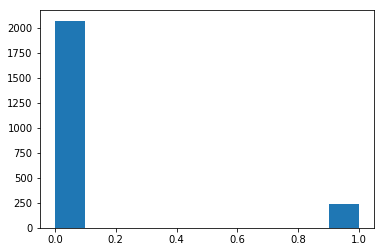

In [30]:
plt.hist(y_test)
print(Counter(y_test))
plt.show();

Counter({0: 2310, 1: 4}) 0.895851339672


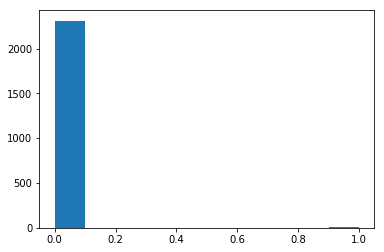

In [37]:
outcome = np.argmax(preds, axis=1)
plt.hist(np.argmax(preds, axis=1))
print(Counter(outcome), sum(outcome==y_test)/len(y_test))
plt.show()

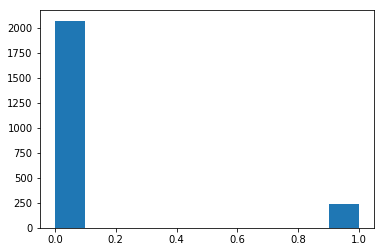

In [39]:
plt.hist(y_test)
plt.show()

# Fit to a SVM model

In [9]:
compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
weights = {0: 0.55267278,  1: 5.2462845}

In [10]:
clf = SVC(class_weight=weights)
t2 = time.time()
clf.fit(flat(train), y)
print("training time:", round(time.time()-t2, 3), "s")

training time: 8167.023 s


In [14]:
t3 = time.time()
preds2 = clf222.predict(flat(test))
print("testing time:", round(time.time()-t3, 3), "s")

testing time: 3936.705 s


In [12]:
# joblib.dump(clf, 'svm.pkl')

['svm.pkl']

In [13]:
clf222 = joblib.load('svm.pkl')

Counter({0: 2293, 1: 21}) 0.890233362143


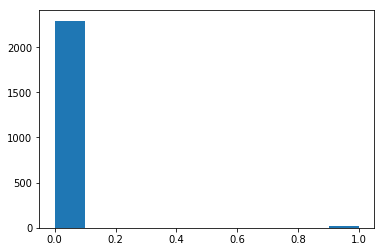

In [20]:
plt.hist(preds2)
print(Counter(preds2), sum(preds2==y_test)/len(y_test))
plt.show()

In [22]:
confusion_matrix(y_test, preds2)

array([[2056,   17],
       [ 237,    4]])